IMPORTING DEPENDENCIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

DATA COLLECTION AND PREPROCESSING

In [3]:
df = pd.read_csv("Cancer.csv")

In [4]:
df.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,High
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.tail()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [6]:
df.shape

(1000, 25)

In [7]:
df.describe()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   int64 
 3   AirPollution           1000 non-null   int64 
 4   Alcoholuse             1000 non-null   int64 
 5   DustAllergy            1000 non-null   int64 
 6   OccuPationalHazards    1000 non-null   int64 
 7   GeneticRisk            1000 non-null   int64 
 8   chronicLungDisease     1000 non-null   int64 
 9   BalancedDiet           1000 non-null   int64 
 10  Obesity                1000 non-null   int64 
 11  Smoking                1000 non-null   int64 
 12  PassiveSmoker          1000 non-null   int64 
 13  ChestPain              1000 non-null   int64 
 14  CoughingofBlood        1000 non-null   int64 
 15  Fatigue               

In [9]:
df.dtypes

Patient Id               object
Age                       int64
Gender                    int64
AirPollution              int64
Alcoholuse                int64
DustAllergy               int64
OccuPationalHazards       int64
GeneticRisk               int64
chronicLungDisease        int64
BalancedDiet              int64
Obesity                   int64
Smoking                   int64
PassiveSmoker             int64
ChestPain                 int64
CoughingofBlood           int64
Fatigue                   int64
WeightLoss                int64
ShortnessofBreath         int64
Wheezing                  int64
SwallowingDifficulty      int64
ClubbingofFingerNails     int64
FrequentCold              int64
DryCough                  int64
Snoring                   int64
Level                    object
dtype: object

In [10]:
df.isnull().sum()

Patient Id               0
Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

In [11]:
df['Level'].replace('High','1',inplace=True)
df['Level'].replace('Low','0',inplace=True)

<Axes: >

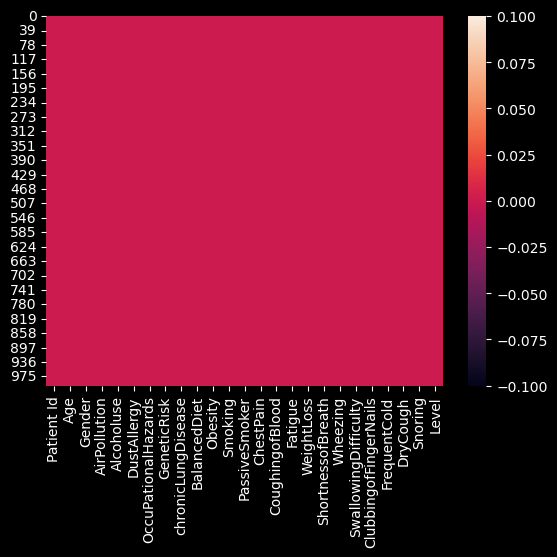

In [55]:
plt.style.use('dark_background')
sns.heatmap(df.isnull())

<Axes: xlabel='Smoking', ylabel='count'>

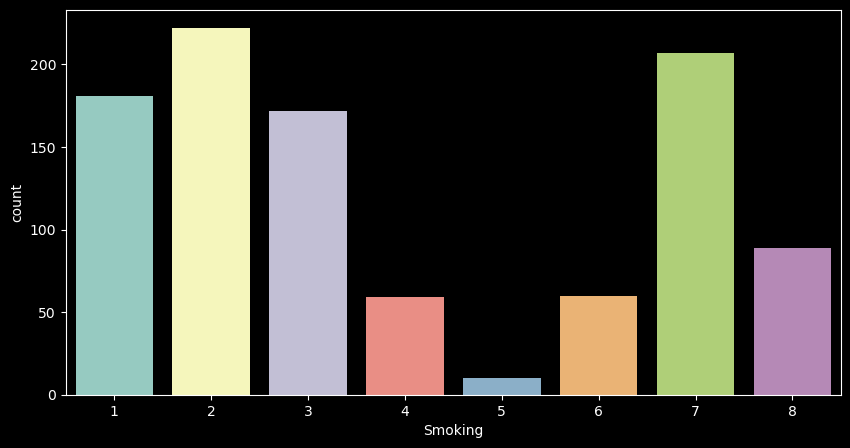

In [56]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df)

<Axes: xlabel='ChestPain', ylabel='count'>

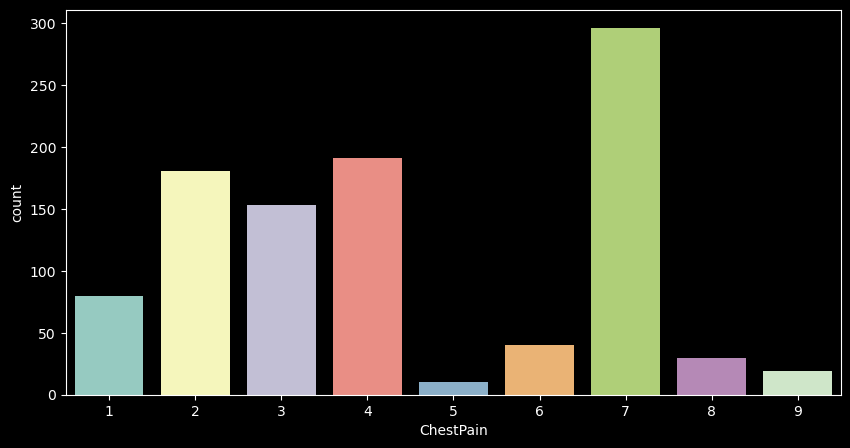

In [57]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.countplot(x='ChestPain',data = df)

<Axes: xlabel='ChestPain', ylabel='Age'>

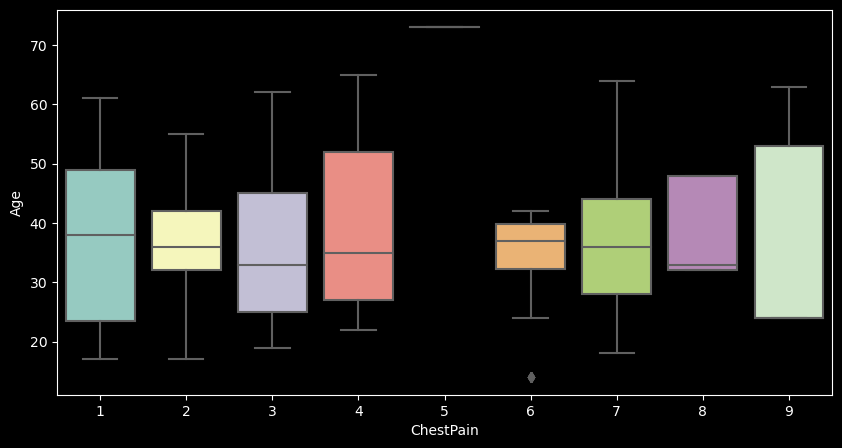

In [58]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.boxplot(x='ChestPain',y='Age',data = df)

<Axes: xlabel='Smoking', ylabel='Age'>

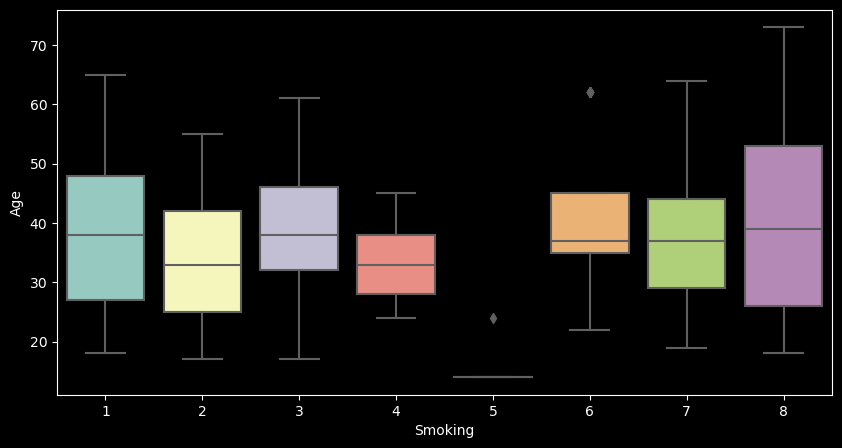

In [59]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.boxplot(x='Smoking',y='Age',data = df)

TRAIN TEST SPLIT

In [17]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'AirPollution', 'Alcoholuse',
       'DustAllergy', 'OccuPationalHazards', 'GeneticRisk',
       'chronicLungDisease', 'BalancedDiet', 'Obesity', 'Smoking',
       'PassiveSmoker', 'ChestPain', 'CoughingofBlood', 'Fatigue',
       'WeightLoss', 'ShortnessofBreath', 'Wheezing', 'SwallowingDifficulty',
       'ClubbingofFingerNails', 'FrequentCold', 'DryCough', 'Snoring',
       'Level'],
      dtype='object')

In [18]:
cat_cols = ['Patient Id']
encoder = OneHotEncoder(drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[cat_cols]).toarray(), columns=encoder.get_feature_names_out(cat_cols))

In [19]:
x= pd.concat([encoded_cols],axis=1) 

y=df['Level']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

NAIVE BAYES CLASSIFIER

In [21]:
classifier=GaussianNB()

In [22]:
classifier.fit(x_train,y_train)

GaussianNB()

In [23]:
classifier.score(x_train, y_train)

1.0

In [24]:
classifier.score(x_test, y_test)

0.275

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [27]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.275


In [28]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.28      1.00      0.43        55
           1       0.00      0.00      0.00        82
      Medium       0.00      0.00      0.00        63

    accuracy                           0.28       200
   macro avg       0.09      0.33      0.14       200
weighted avg       0.08      0.28      0.12       200



In [29]:
print(metrics.confusion_matrix(y_test, y_pred))

[[55  0  0]
 [82  0  0]
 [63  0  0]]


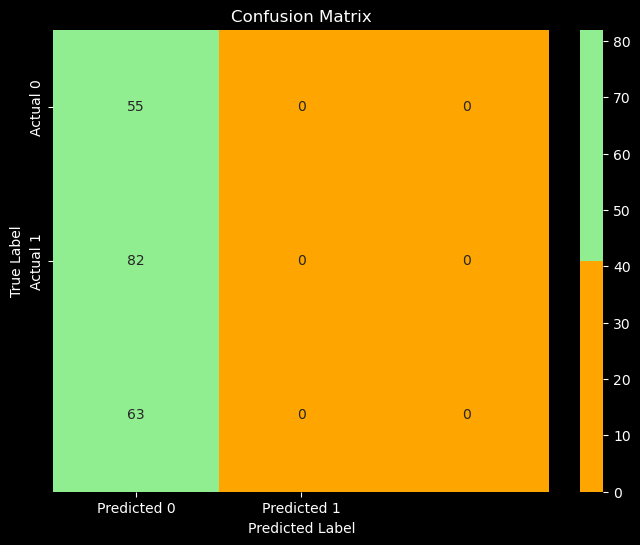

In [60]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
colors = ['orange', 'lightgreen']
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KNN MODEL

In [31]:
k=5
knn_model=KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
print(f"Training score : {knn_model.score(x_train,y_train)}")
print(f"Testing score : {knn_model.score(x_test,y_test)}")

Training score : 0.5475
Testing score : 0.315


In [33]:
y_pred=classifier.predict(x_test)

In [34]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.275


In [35]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.28      1.00      0.43        55
           1       0.00      0.00      0.00        82
      Medium       0.00      0.00      0.00        63

    accuracy                           0.28       200
   macro avg       0.09      0.33      0.14       200
weighted avg       0.08      0.28      0.12       200



In [36]:
print(metrics.confusion_matrix(y_test, y_pred))

[[55  0  0]
 [82  0  0]
 [63  0  0]]


MODEL TUNNING

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

knn_classifier = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')

knn_grid_search.fit(x_train, y_train)

print("Best parameters for K-Nearest Neighbors:", knn_grid_search.best_params_)

knn_best_model = knn_grid_search.best_estimator_
print("Accuracy :", knn_best_model.score(x_test, y_test))


Best parameters for K-Nearest Neighbors: {'n_neighbors': 5}
Accuracy : 0.315
